In [1]:
import scanpy as sc
import numpy as np

In [2]:
Perez_adata = sc.read_h5ad("../Data/Perez_Shibayama_Christian_et_al/Perez_Shibayama_Christian_et_al.h5ad")

In [3]:
np.max(Perez_adata.X)
Perez_adata.X = Perez_adata.raw.X
Perez_adata.raw = None
Perez_adata.X = np.round(Perez_adata.X).astype(np.int32)
np.max(Perez_adata.X)

np.int32(23612)

In [4]:
Perez_adata.obs['sample'] = Perez_adata.obs.index.str.split('.').str[0]

In [5]:
def extract_gene_name(feature_str):
    if '.' in feature_str:
        return feature_str.split('.')[-1]
    else:
        return feature_str
standard_gene_names = [extract_gene_name(feature) for feature in Perez_adata.var['features'].astype(str)]
Perez_adata.var_names = standard_gene_names
Perez_adata.var_names_make_unique()
print(f"Perez数据集 - 从features提取的基因名示例: {standard_gene_names[:5]}")

Perez数据集 - 从features提取的基因名示例: ['Xkr4', 'Gm37180', 'Gm37363', 'Gm37686', 'Gm37329']


In [6]:
sc.pp.filter_cells(Perez_adata, min_genes=200)
sc.pp.filter_genes(Perez_adata, min_cells=3)
print(Perez_adata.obs)
sc.pp.scrublet(Perez_adata, batch_key="sample")

In [7]:
Perez_adata.var["mt"] = Perez_adata.var_names.str.startswith("mt-")
Perez_adata.var["ribo"] = Perez_adata.var_names.str.contains("^Mrp[ls]")
Perez_adata.var["hb"] = Perez_adata.var_names.str.contains("^Hb[^(P)]")
sc.pp.calculate_qc_metrics(
    Perez_adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
Perez_adata


AnnData object with n_obs × n_vars = 56004 × 28582
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'dataset', 'label', 'cond', 'treatment', 'label_plus_cond', 'label_plus_treat', 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'features', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
    obsm: 'X_PCA', 'X_TSNE', 'X_UMAP'

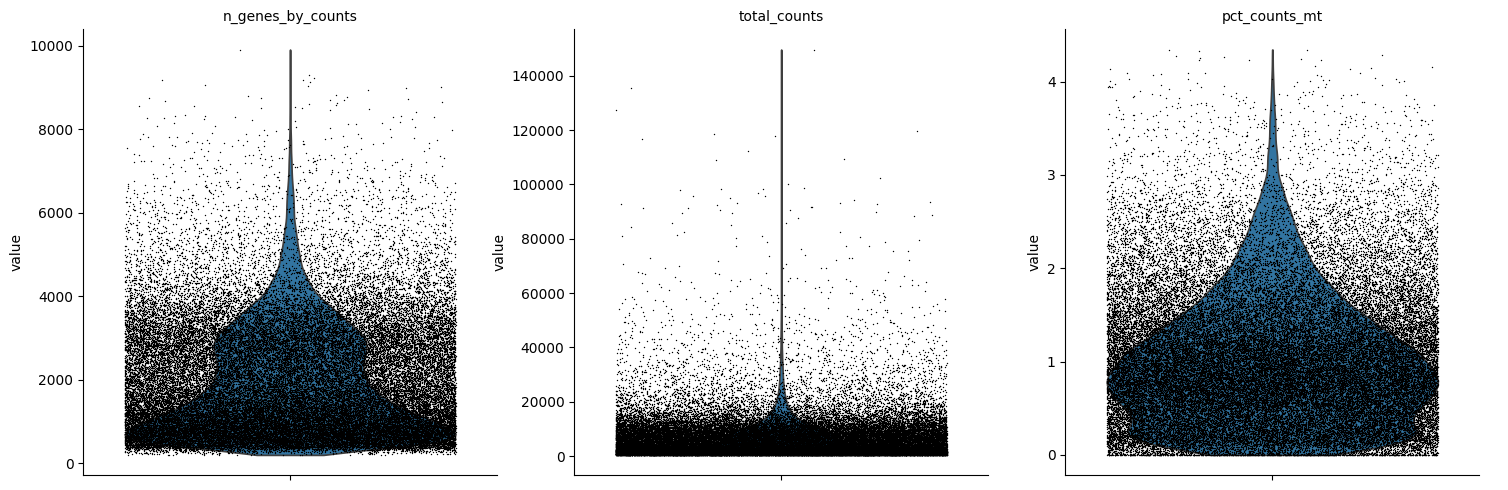

In [8]:
sc.pl.violin(
    Perez_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [9]:
Perez_adata = Perez_adata[Perez_adata.obs.predicted_doublet == False, :]
Perez_adata = Perez_adata[Perez_adata.obs.doublet_score <= 0.25, :]
Perez_adata

View of AnnData object with n_obs × n_vars = 54998 × 28582
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'dataset', 'label', 'cond', 'treatment', 'label_plus_cond', 'label_plus_treat', 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'features', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
    obsm: 'X_PCA', 'X_TSNE', 'X_UMAP'

In [10]:
Perez_adata = Perez_adata[Perez_adata.obs.n_genes_by_counts < 5000, :]
Perez_adata = Perez_adata[Perez_adata.obs.pct_counts_mt < 20, :]
Perez_adata = Perez_adata[Perez_adata.obs.total_counts < 20000, :]
Perez_adata = Perez_adata[Perez_adata.obs.total_counts > 500, :]
print(Perez_adata)


View of AnnData object with n_obs × n_vars = 52572 × 28582
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'dataset', 'label', 'cond', 'treatment', 'label_plus_cond', 'label_plus_treat', 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'features', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
    obsm: 'X_PCA', 'X_TSNE', 'X_UMAP'


In [11]:
Perez_adata.write_h5ad("../Data/Perez_Shibayama_Christian_et_al.h5ad")